<a href="https://www.kaggle.com/code/mohmdhmedi/rice-images-cnn?scriptVersionId=191872118" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:navy;"><span style="font-family:cursive;"> Rice Image CNN Project with Tensorflow and Keras </span> </span>  </span></p>

# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style='border: 3px solid none; background-color: #f2f2f2; font-family: Times New Roman; font-size: 110%; padding: 10px'>

* **[1. A Brief Explanation](#1)**

  - What is the project about?
    
  - Importance of this topic
   
   
* **[2. About this project](#2)**

  - Why we have used this method?
    
  - Recommended usage of the method?
    
    
    
* **[3. Import Libraries](#3)**

  - Key libraries used in this project
  
  
* **[4. Import Dataset](#4)**  

   - Importing the dataset 
   
   
   
* **[5. Data Augmentation and Visualisation](#4)**

   - Techniques applied to enhance the dataset
    
    
    
* **[6. Modeling](#6)**

   - Applying Convolutional Neural Networks (CNN) using TensorFlow/Keras
    
    
    
* **[7. Training the Model](#7)**

   - Training process and parameters used
    
    
* **[8. Evaluating Results](#8)**

   - Analyzing the model outcomes to select the best one

<a id="1"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>


* **1. What is the project about?**

  - This project aims to classify different types of rice grains using images. The dataset consists of rice images from five distinct classes: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The goal is to develop an accurate model that can distinguish between these classes based on the given images.
   
    
    
* **2. Importance of this topic**
    
  - Identifying rice types accurately is essential for quality control in the food industry, agricultural research, and culinary applications. An automated classification system can significantly reduce the time and effort required for this process, leading to better efficiency and reliability.

</div>

<a id="2"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About this project </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>

* **1. Why we have used this method?**

  - Convolutional Neural Networks (CNNs) are highly effective for image classification tasks due to their ability to capture spatial hierarchies in images. This makes them an ideal choice for classifying rice grain images.
   
   
* **2. Recommended usage of the method?**
    
  - The CNN model implemented using TensorFlow/Keras is recommended for this task as it leverages advanced deep learning techniques to achieve high accuracy in image classification.
  

</div>


<a id="3"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>

* **Key libraries used in this project**

  - tensorflow, keras: For implementing and training the CNN model.
  - numpy: For data manipulation.
  - matplotlib: For visualization.
   
    
</div>


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random
import os
import shutil
import random

2024-08-09 20:41:45.412207: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 20:41:45.412325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 20:41:45.589748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h3><b>First lets Split the dataset</b></h3>

In [2]:
#os is used for creating directories and handling file paths.
#shutil is used for copying files.
#random is used to shuffle the list of images for randomness.

# Set paths
#original_dataset_dir = /kaggle/input/Rice_Images_CNN_Datasets'
#base_dir = '/kaggle/input/Rice_Images_CNN_Datasets/'
#train_dir = os.path.join(base_dir, 'train')
#test_dir = os.path.join(base_dir, 'test')
#val_dir = os.path.join(base_dir, 'val')

# Create directories for the split dataset
#os.makedirs(train_dir, exist_ok=True)
#os.makedirs(test_dir, exist_ok=True)
#os.makedirs(val_dir, exist_ok=True)

#rice_types = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Function to split data
#def split_data(rice_type, train_ratio=0.8, val_ratio=0.2):
    # Create subdirectories for each rice type
#    os.makedirs(os.path.join(train_dir, rice_type), exist_ok=True)
#    os.makedirs(os.path.join(test_dir, rice_type), exist_ok=True)
#    os.makedirs(os.path.join(val_dir, rice_type), exist_ok=True)
    
    # List all images in the original dataset
#    rice_images = os.listdir(os.path.join(original_dataset_dir, rice_type))
    
    # Shuffle the list
#    random.shuffle(rice_images)
    
    # Calculate the split indices
#    train_split_index = int(len(rice_images) * train_ratio)
#    val_split_index = int(len(rice_images) * val_ratio) + train_split_index
    
    # Split the data
#    train_images = rice_images[:train_split_index]
#    val_images = rice_images[train_split_index:val_split_index]
#    test_images = rice_images[val_split_index:]
    
    # Move the images to the new folders
#    for image in train_images:
#        src = os.path.join(original_dataset_dir, rice_type, image)
#        dst = os.path.join(train_dir, rice_type, image)
#        shutil.copyfile(src, dst)
        
#    for image in val_images:
#        src = os.path.join(original_dataset_dir, rice_type, image)
#        dst = os.path.join(val_dir, rice_type, image)
#        shutil.copyfile(src, dst)
        
#    for image in test_images:
#        src = os.path.join(original_dataset_dir, rice_type, image)
#        dst = os.path.join(test_dir, rice_type, image)
#       shutil.copyfile(src, dst)

# Split data for each rice type
#for rice_type in rice_types:
#    split_data(rice_type)


<h4>By using above code, I splited the dataset to the val, train and test folders. Now we can proceed. This script is useful you can use it.</h4>

<a id="4"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset and Data Augmentation</p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Importing the dataset**

- The dataset is divided into training, validation, and test sets. Each set contains images categorized  into five classes: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The dataset is loaded using TensorFlow/Keras data loaders.
    
* **Data Augmentation**
    
- Techniques applied to enhance the dataset, Image augmentation techniques are applied to the training set to handle noise and enhance the model's robustness. Techniques include rotation, width/height shift, shear, zoom, and horizontal flip.
    
</div>

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/train/'
val_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/val/'
test_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/test'

# Load train dataset
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Load validation dataset
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Load test dataset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [4]:
# To check that there is no other folder names

print("Train classes:", train_data.class_indices)
print("Validation classes:", val_data.class_indices)
print("Test classes:", test_data.class_indices)

Train classes: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Validation classes: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Test classes: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}



# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization of Dataset</p>

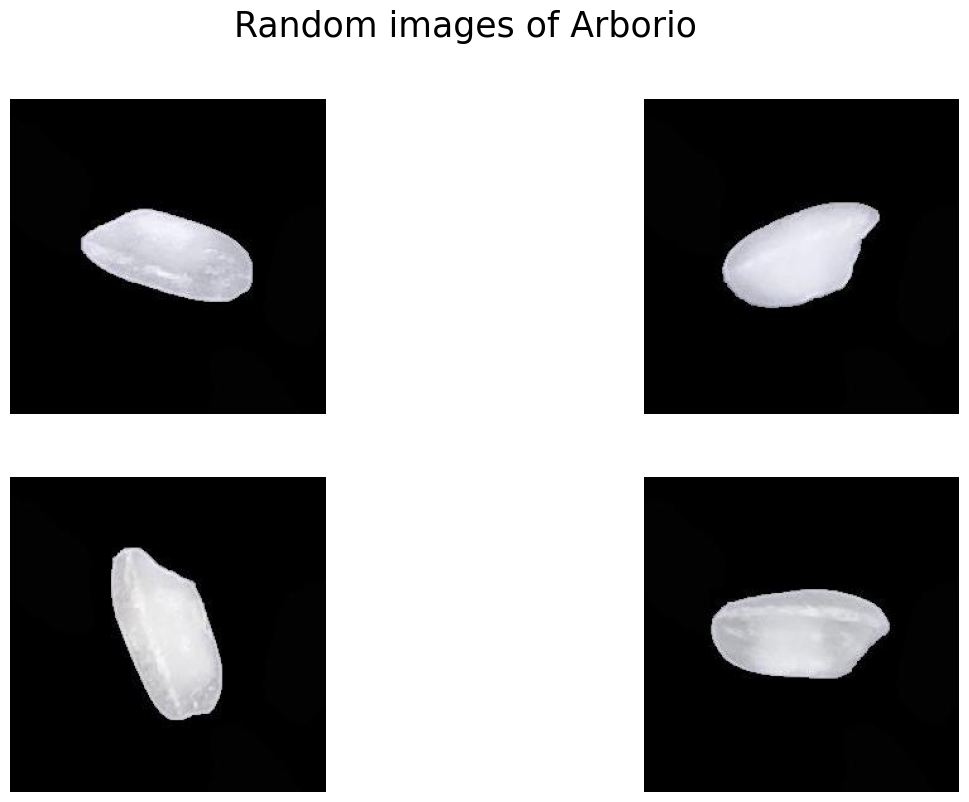

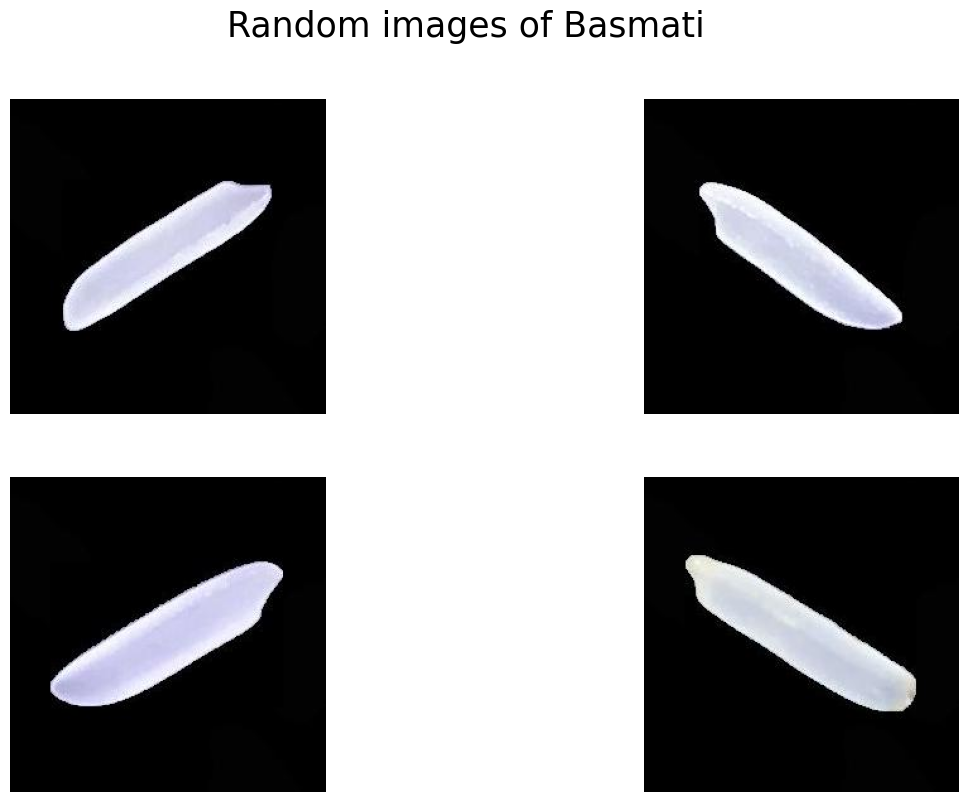

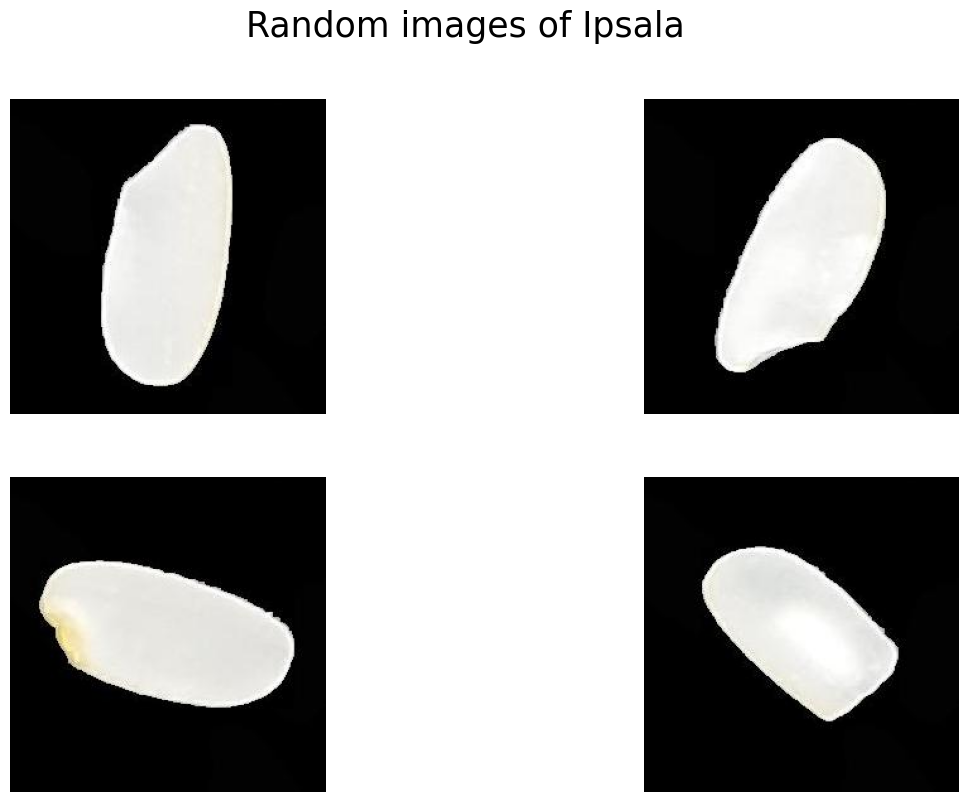

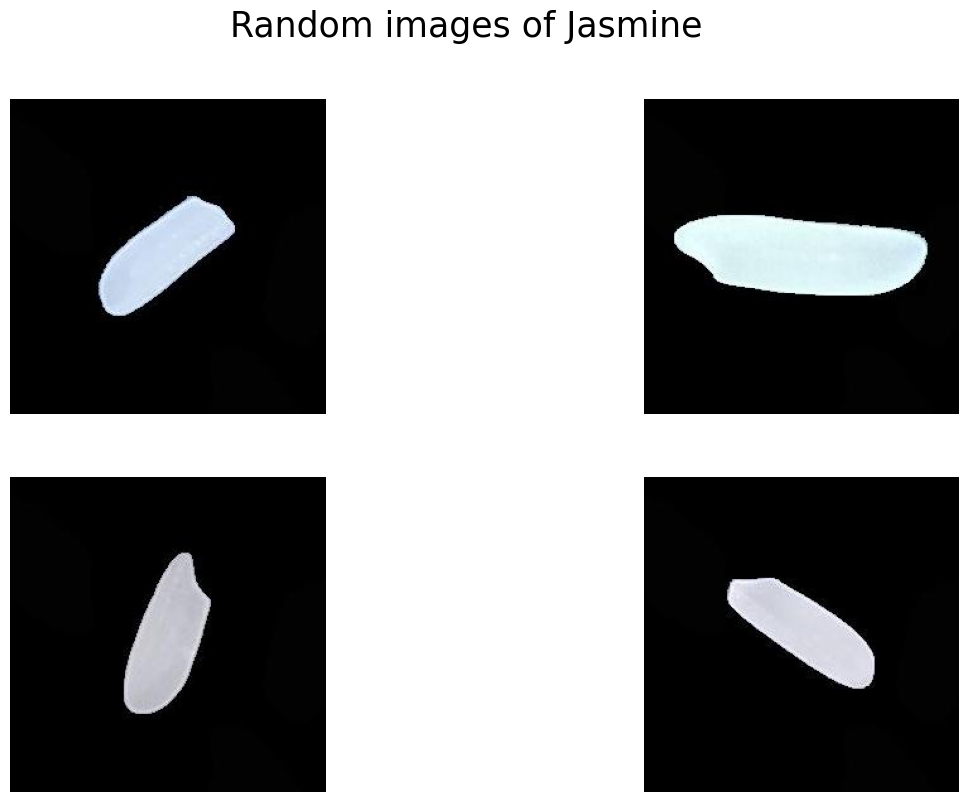

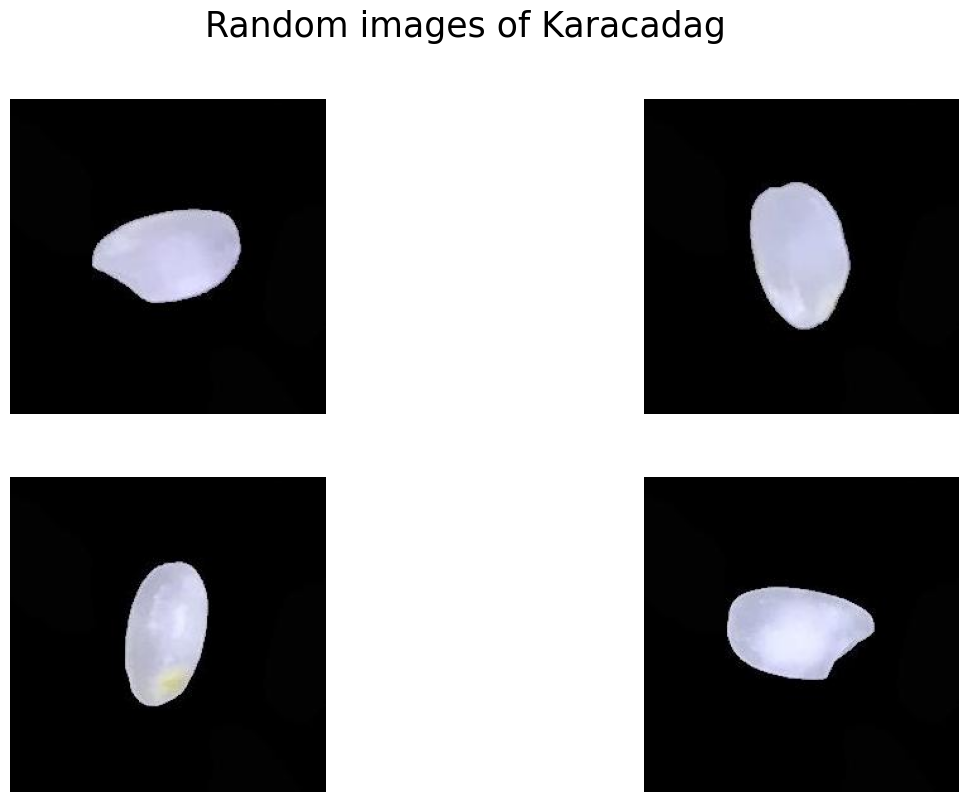

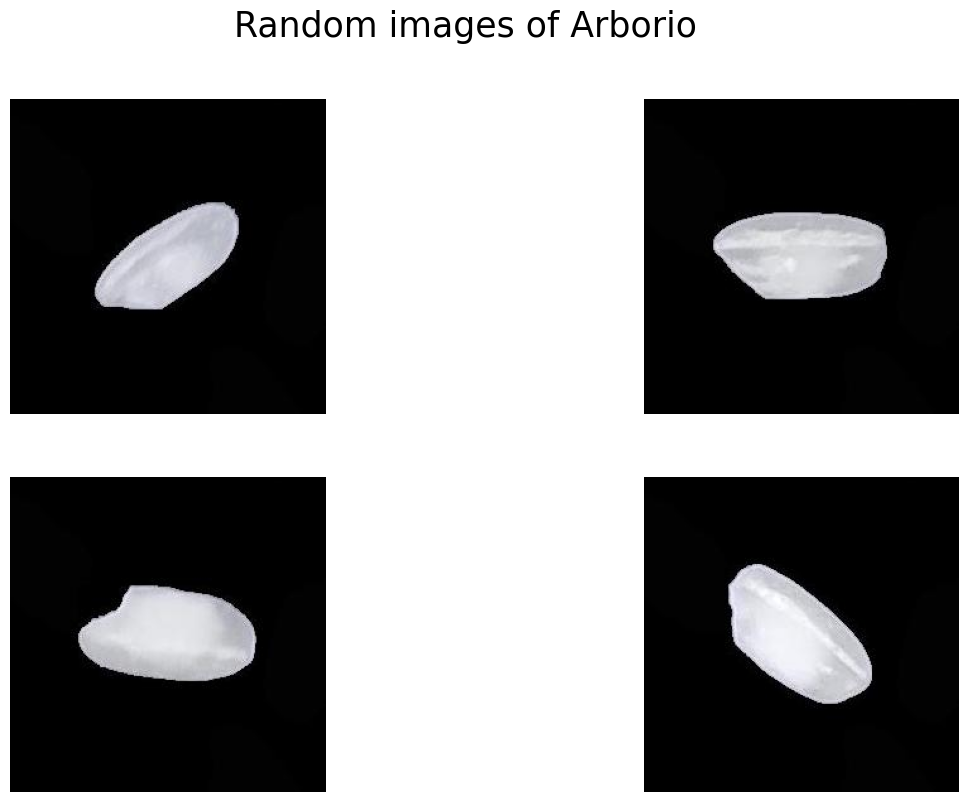

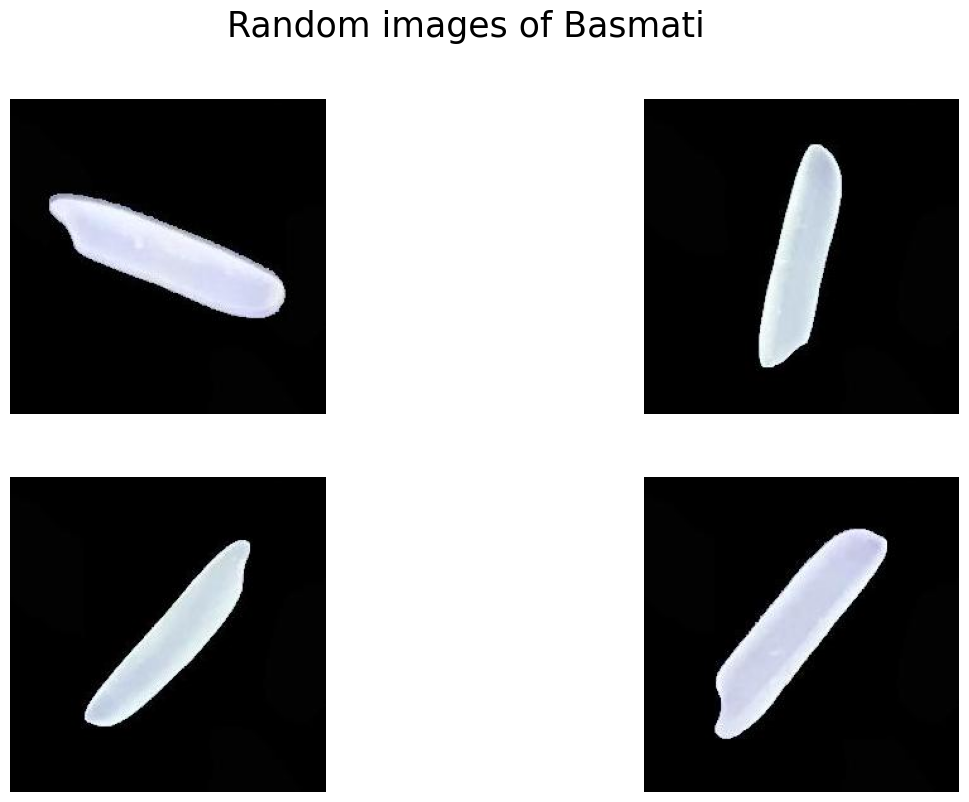

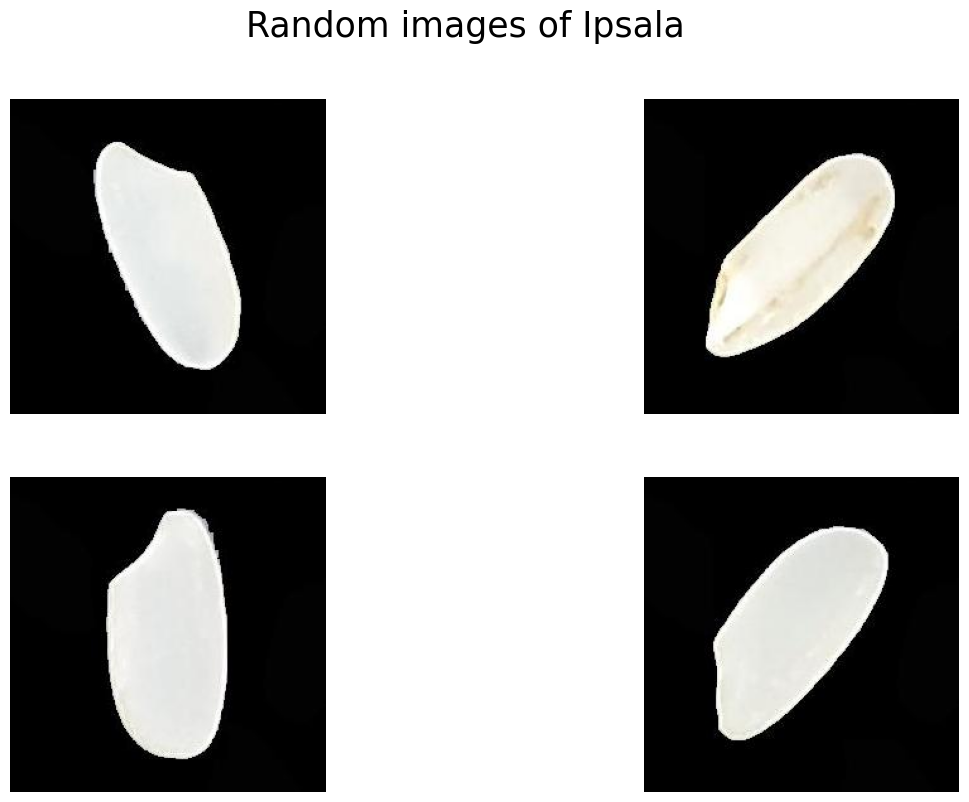

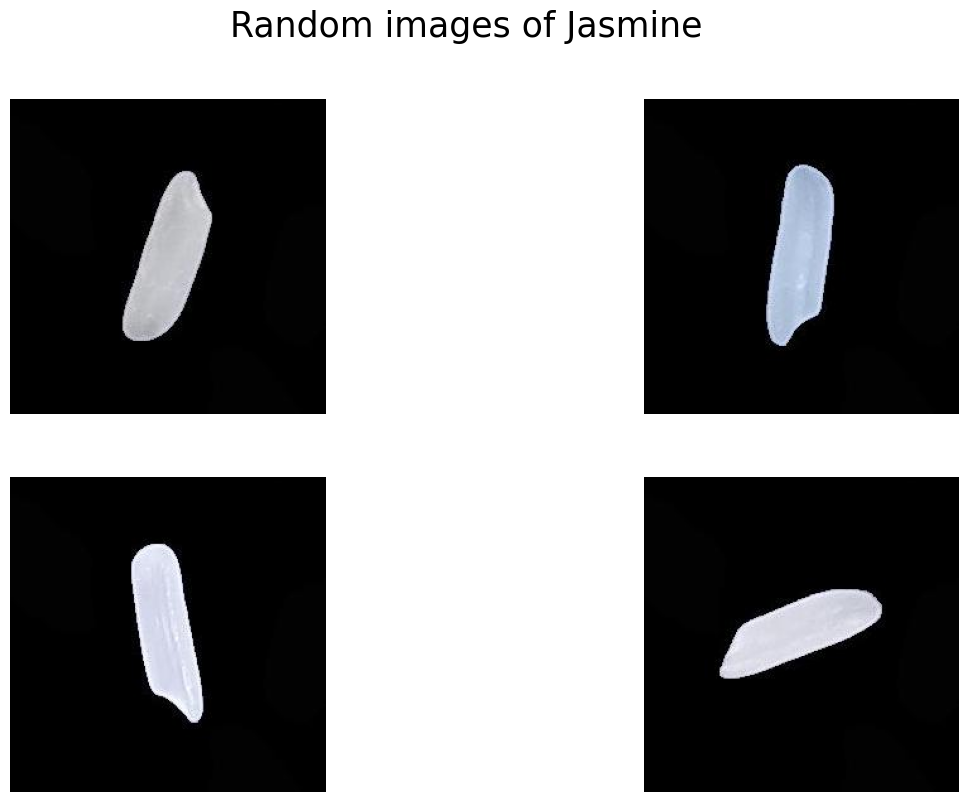

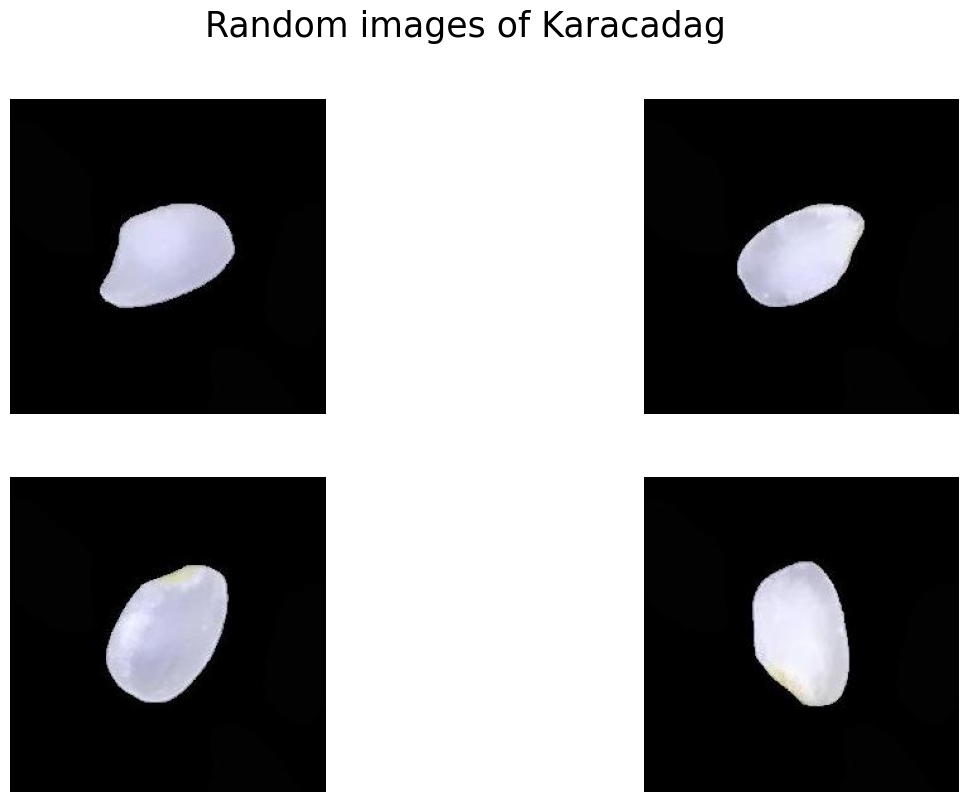

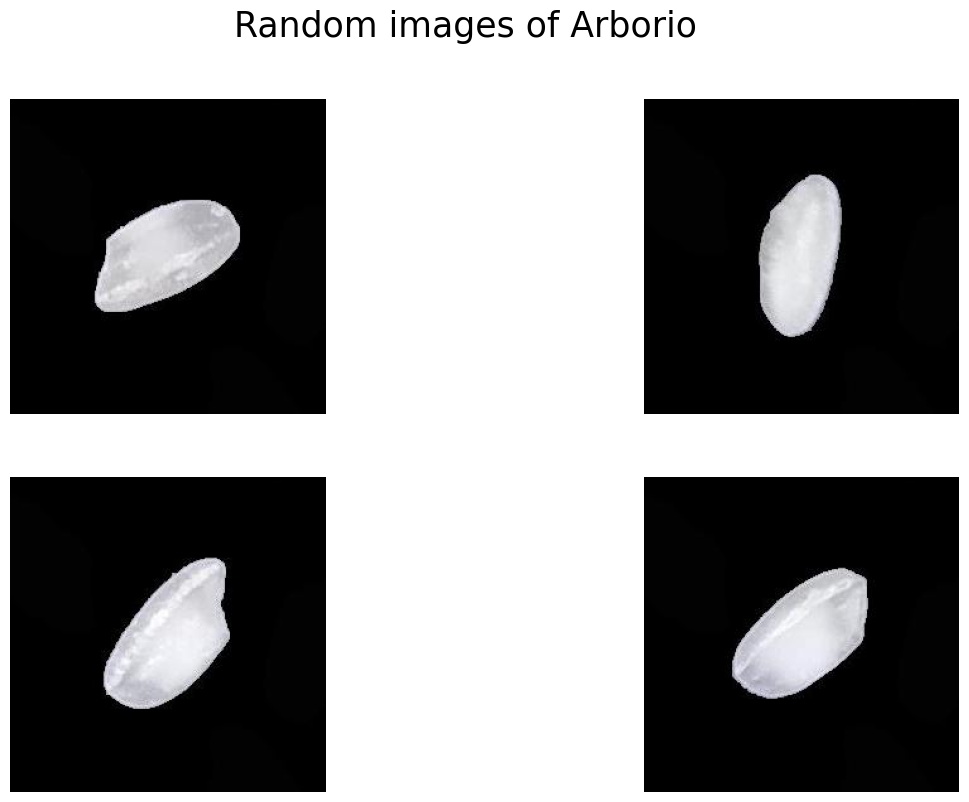

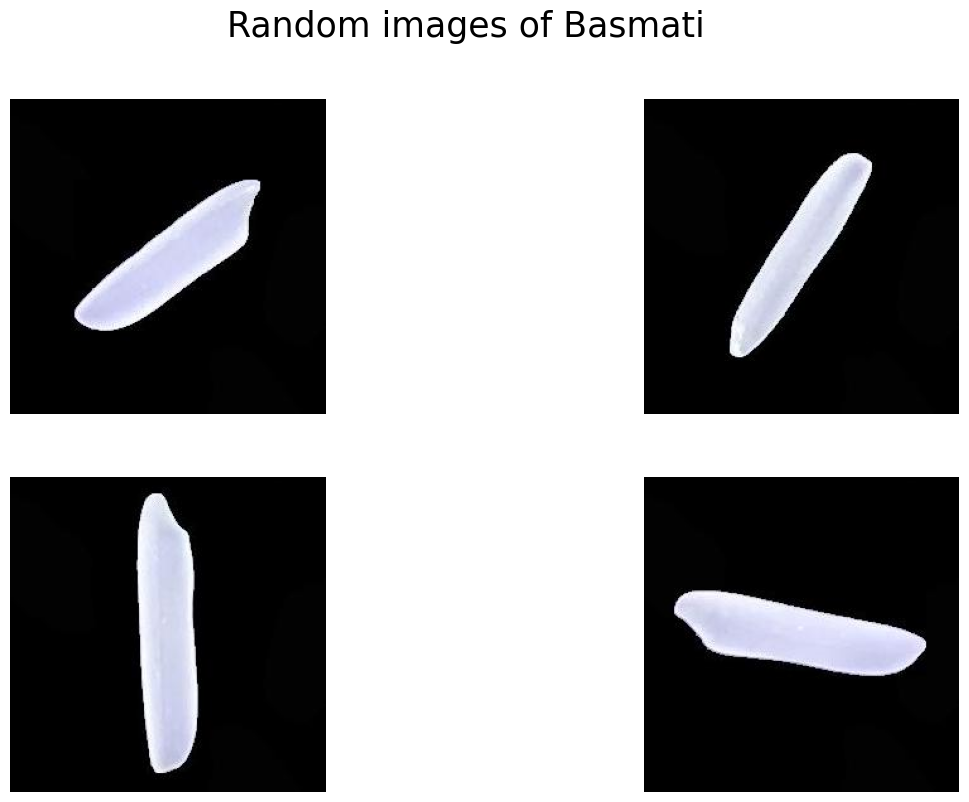

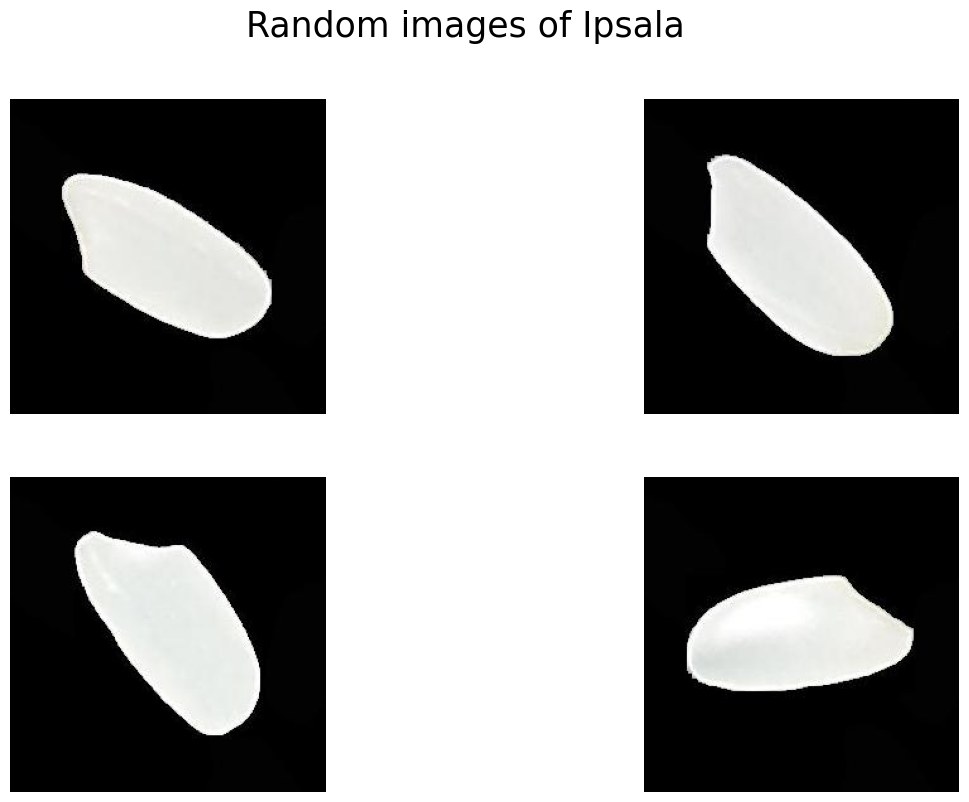

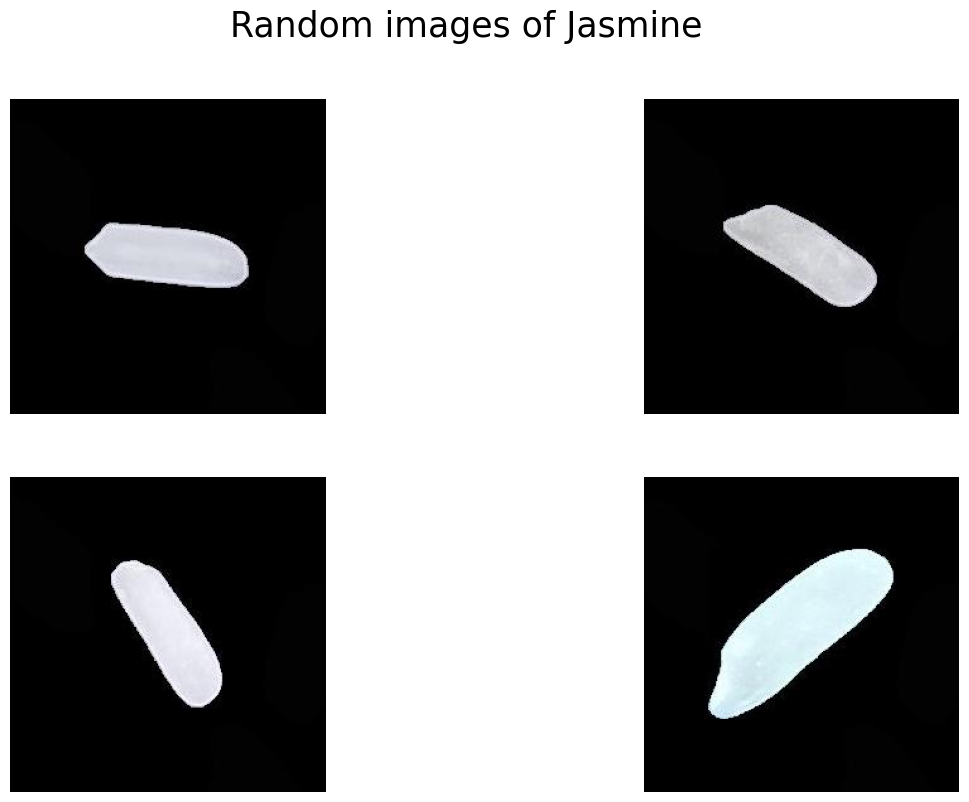

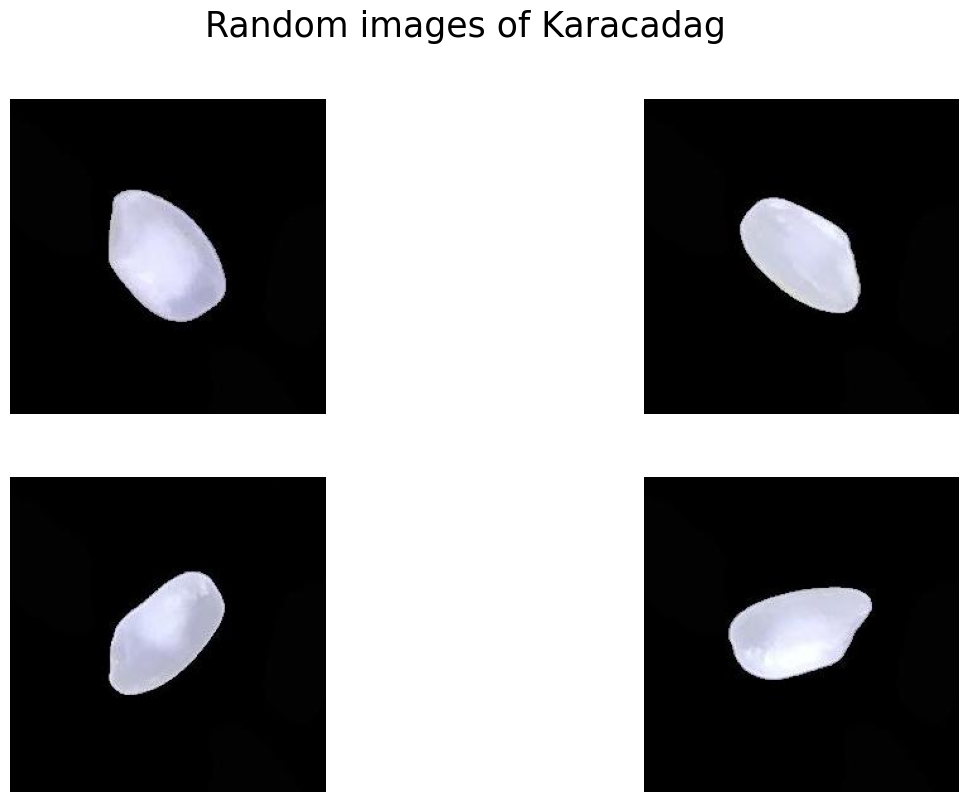

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the class names
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Function to plot random images for a given class
def plot_random_images(class_name, class_dir, num_images=4):
    # List all images in the directory
    images_list = os.listdir(class_dir)
    
    # Select random images
    random_images = random.sample(images_list, num_images)
    
    plt.figure(figsize=(15, 9))
    plt.suptitle(f"Random images of {class_name}", fontsize=25)
    
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(class_dir, img_name)
        img = imread(img_path)
        
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
    
    plt.show()

# Set the path to your dataset directory
base_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split'

# Plot random images for each class in each dataset directory (train, val, test)
for dataset_type in ['train', 'val', 'test']:
    dataset_dir = os.path.join(base_dir, dataset_type)
    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.exists(class_dir):  # Check if the directory exists
            plot_random_images(class_name, class_dir)
        else:
            print(f"Directory {class_dir} does not exist.")


<a id="6"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Modeling </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Modeling**

- Applying Convolutional Neural Networks (CNN) using TensorFlow/Keras . A CNN model is built using TensorFlow/Keras, with multiple convolutional and pooling layers, followed  by dense layers for classification..
    
    
</div>

In [6]:
# Build a VGG-like model

model = Sequential([
    Input(shape=(256, 256, 3)),

    # First Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth Block
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fifth Block
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Output layer for 5 classes
])

<a id="7"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Training the Model </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Training process and parameters used**

- The model is trained with early stopping and learning rate reduction callbacks to optimize performance. The training process involves feeding the augmented data into the model and iteratively adjusting the model parameters to minimize the loss function.
    
</div>

In [7]:
#Compile the model

model.compile(optimizer=AdamW(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import Callback

class CustomCheckpoint(Callback):
    def __init__(self, filepath):
        super(CustomCheckpoint, self).__init__()
        self.filepath = filepath
        self.best_val_loss = float('inf')  # Initialize with a large value

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            current_val_loss = logs.get('val_loss')
            if current_val_loss is not None and current_val_loss < self.best_val_loss:
                self.best_val_loss = current_val_loss
                self.model.save(self.filepath)
                print(f"Saved model to {self.filepath}")

# Use CustomCheckpoint
custom_checkpoint_callback = CustomCheckpoint('best_model.h5')

# Train the model with CustomCheckpoint
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
        custom_checkpoint_callback  # Use CustomCheckpoint callback
    ]
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-09 20:44:10.515597: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,256,256]{3,2,1,0}, f32[32,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-09 20:44:13.973802: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.458411701s
Trying algorithm eng0{} for conv (f32[64,6

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.7799 - loss: 1.2145

W0000 00:00:1723237388.306416     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723237444.567319     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Saved model to best_model.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1291s 613ms/step - accuracy: 0.7799 - loss: 1.2141 - val_accuracy: 0.4728 - val_loss: 13.1123 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.9588 - loss: 0.2043Saved model to best_model.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1134s 603ms/step - accuracy: 0.9588 - loss: 0.2043 - val_accuracy: 0.4927 - val_loss: 3.8100 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.9739 - loss: 0.1165Saved model to best_model.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1132s 602ms/step - accuracy: 0.9739 - loss: 0.1166 - val_accuracy: 0.6408 - val_loss: 2.4919 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9677 - loss: 0.1689Saved model to best_model.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1131s 601ms/step - accuracy: 0.9677 - loss: 0.1689 - val_accuracy: 0.9455 - val_loss: 0.2499 - learning_rate: 1.0000e-04
Epoch 5/

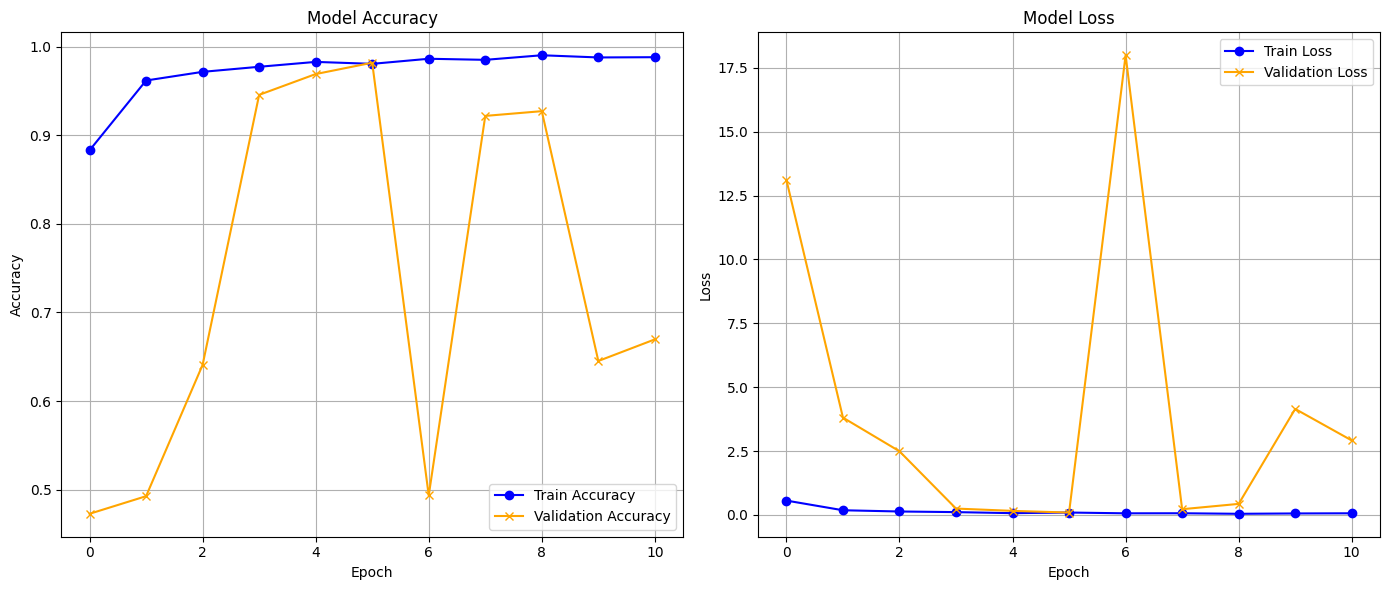

In [9]:
import matplotlib.pyplot as plt

# Define a function to plot the training history
def plot_training_history(history):
    # Create a figure with a specific size
    plt.figure(figsize=(14, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', marker='x')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue', linestyle='-', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-', marker='x')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


<a id="8"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Evaluating Results </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Analyzing the model outcomes to select the best one**

- The performance of the model is evaluated based on accuracy and loss on the test set. Training and validation accuracy and loss are plotted to visualize the model's learning progress and final performance.
    
</div>

In [10]:
# Load the best model weights
model.load_weights('best_model.h5')

# Evaluate the model on the test data
evaluation = model.evaluate(test_data)
print(f'Test accuracy: {evaluation[1] * 100:.2f}%')


235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - accuracy: 0.9835 - loss: 0.1028
Test accuracy: 98.31%
